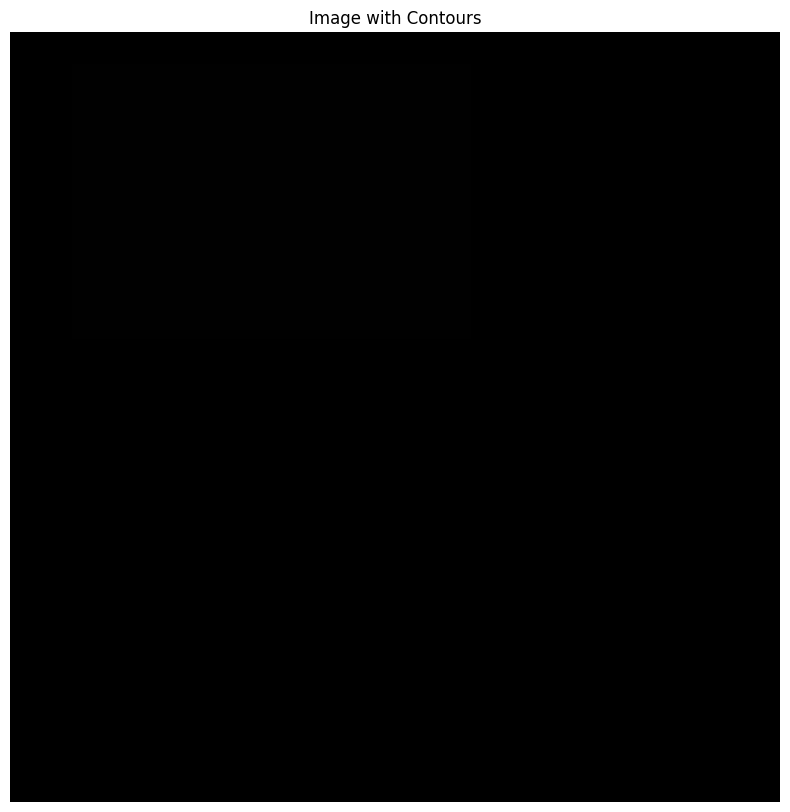

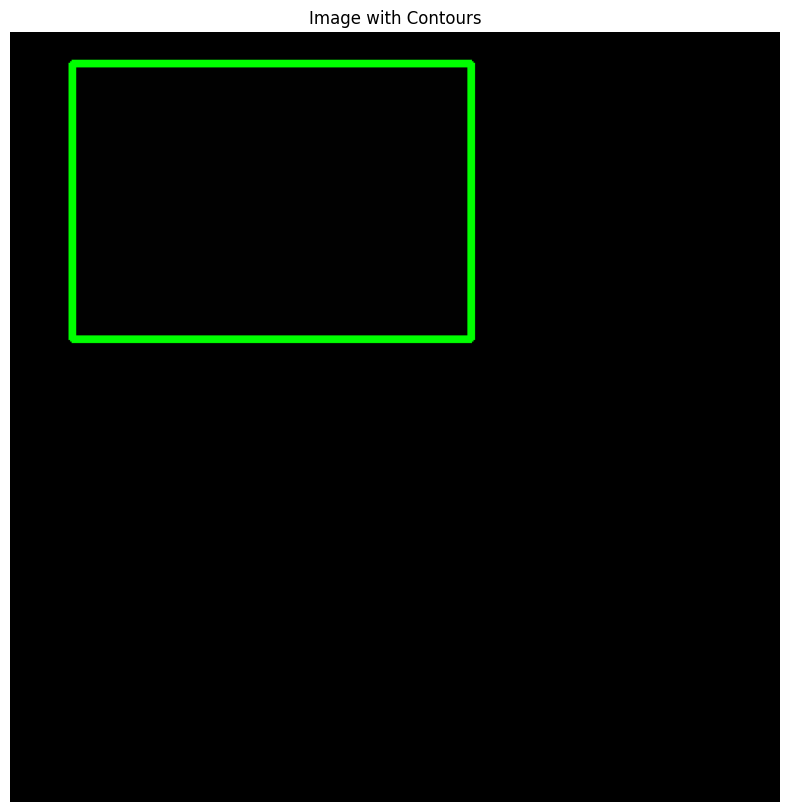

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import FileLink

path = 'imageSource/white.jpg'

image = np.zeros([500, 500, 3], dtype = np.uint8) 
image[20:200, 40:300] = 1
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Image with Contours')
plt.axis('off')  # Hide axes
plt.show()
#image = cv.imread(path)

assert image is not None, "file could not be read, check with os.path.exists()"

# Convert image to grayscale
imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv.threshold(imgray, 127, 255, 0)

thresh = ( imgray > 0).astype(np.uint8)
#thresh = np.zeros_like(thresh)
#thresh[3:100, 4:80] = 1


# Check OpenCV version and handle findContours output accordingly
try:
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
except ValueError:
    im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image (or a copy of it)
image_with_contours = image.copy()
cv.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Convert BGR image to RGB for displaying with matplotlib
image_with_contours_rgb = cv.cvtColor(image_with_contours, cv.COLOR_BGR2RGB)

# Display the image with contours using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_with_contours_rgb)
plt.title('Image with Contours')
plt.axis('off')  # Hide axes
plt.show()
